In [119]:
import pandas as pd

import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(16, 8)})


# read datasets

df_powerSpectrum = pd.read_csv("/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/deji/powerByBand_1667172667.csv")
df_signalQuality = pd.read_csv("/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/deji/signalQuality_1667172667.csv")


random brian notes

 Roughly speaking, the theta frequency in the frontal cortex is positively correlated with increasing CWL, while conversely, the alpha frequency of the parietal cortex decreases as CWL increases (Gevins et al., 1997; Lei & Roetting, 2011). 

In [44]:
df_powerSpectrum

,unixTimestamp,CP3_alpha,CP3_beta,CP3_delta,CP3_gamma,CP3_theta,C3_alpha,C3_beta,C3_delta,C3_gamma,C3_theta,F5_alpha,F5_beta,F5_delta,F5_gamma,F5_theta,PO3_alpha,PO3_beta,PO3_delta,PO3_gamma,PO3_theta,PO4_alpha,PO4_beta,PO4_delta,PO4_gamma,PO4_theta,F6_alpha,F6_beta,F6_delta,F6_gamma,F6_theta,C4_alpha,C4_beta,C4_delta,C4_gamma,C4_theta,CP4_alpha,CP4_beta,CP4_delta,CP4_gamma,CP4_theta
0,1667172668,2.842583,1.136156,5.684665,0.263312,4.588783,8.538349,3.601820,11.352822,0.996056,10.114094,1.900530,0.686413,6.929738,0.279790,7.932818,3.282290,1.285209,4.191740,0.335897,5.362449,3.390843,2.649943,4.886101,0.592818,4.205458,2.990364,1.094581,6.371151,0.431093,8.121664,2.765301,1.435210,1.974806,0.333352,3.400342,1.469268,1.555249,2.551410,0.296016,2.129044
1,1667172668,2.411235,1.722875,3.463671,0.332742,2.219221,5.534598,4.582838,9.827254,0.618751,5.119830,1.272948,0.881192,2.442068,0.131139,2.281415,3.120453,1.651450,3.489908,0.362440,2.875451,6.880399,3.049066,9.738139,0.555167,6.048412,1.340478,2.036230,4.361215,0.479142,3.245718,1.660499,1.544438,3.026977,0.310229,3.273435,2.567680,1.476905,1.333494,0.343507,1.214782
2,1667172668,2.715165,1.353843,3.606686,0.324540,1.722402,4.183642,2.115731,15.056779,0.712919,7.789188,1.084811,0.538834,2.872341,0.186359,2.989684,4.636385,1.301678,4.317334,0.285767,5.851803,3.101755,2.710383,4.370594,0.509821,4.365750,3.156002,1.382101,7.388411,0.366388,9.233093,2.270795,1.514520,2.125929,0.370119,3.383850,2.964807,1.485673,3.067915,0.307371,5.903121
3,1667172668,1.503121,1.196821,2.034073,0.235574,0.866590,7.731453,2.617913,11.269381,0.563778,7.006513,1.965470,0.914301,1.330889,0.159135,2.532043,0.919565,1.436193,5.388088,0.230912,3.319131,5.079245,2.211021,3.886231,0.335734,4.985468,1.253274,1.399296,2.067776,0.303854,1.365865,1.180717,1.475520,5.004117,0.353755,4.520533,1.217508,1.292149,1.593762,0.293338,2.269241
4,1667172669,1.177371,0.684436,2.107439,0.296775,1.453737,4.230242,1.880246,13.761782,0.607238,7.256711,2.457869,0.988899,1.742482,0.153032,3.170484,0.487393,0.597932,2.368213,0.238318,1.513589,2.309609,1.464848,8.885746,0.424382,6.239317,1.852033,1.378220,3.678769,0.332001,2.521488,2.536714,1.259376,1.649123,0.374804,2.739609,1.690334,0.910638,1.734286,0.275777,1.011730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,1667173266,1.713252,0.539131,2.844260,0.066989,3.079201,3.078607,0.625923,4.264001,0.170408,3.678556,4.574875,0.919808,7.945195,0.346940,4.589754,2.038791,0.602321,4.309883,0.068096,3.622138,5.825740,2.440203,45.370854,0.891757,18.454779,6.017109,2.801580,40.623208,1.104671,23.492324,5.107734,0.873749,1.704258,0.111416,2.076618,2.873644,0.503098,1.740845,0.141190,1.390274
2393,1667173266,1.341297,0.751807,1.532045,0.093407,2.983865,3.390673,0.789801,2.703594,0.076026,4.318907,2.318149,1.196090,3.993307,0.266764,2.532904,1.320991,0.791104,1.339415,0.059311,2.631078,7.483808,2.499051,24.917171,0.733479,11.355954,3.157205,1.712112,20.598211,0.624410,11.320443,1.320531,0.669352,1.682437,0.112411,2.298117,2.671005,0.711821,3.698492,0.108682,4.569866
2394,1667173266,0.954491,0.690787,3.079049,0.125329,4.030642,1.548414,0.748314,6.307430,0.124714,6.399797,2.597175,0.800409,11.131765,0.264599,9.577226,1.436353,0.527136,1.969093,0.068379,3.084792,13.689577,2.978050,63.542536,0.787432,37.425373,2.465163,1.342631,9.985403,0.333748,7.171776,2.981937,0.894866,2.171938,0.179240,2.026990,2.694588,0.932497,1.637407,0.105484,1.835892
2395,1667173266,0.657322,0.808044,0.980916,0.173068,0.971383,2.169432,0.741252,1.658732,0.152055,0.952847,2.237497,0.652751,6.471394,0.203495,3.705297,0.963128,0.559125,1.884118,0.101542,2.364711,8.222121,1.364869,32.202378,0.523532,12.829132,2.088473,1.142850,9.353996,0.341373,9.261885,1.449077,0.630695,2.273236,0.208237,3.003200,2.094076,0.536918,2.033419,0.120427,2.720527


<AxesSubplot:xlabel='unixTimestamp', ylabel='CP4_alpha'>

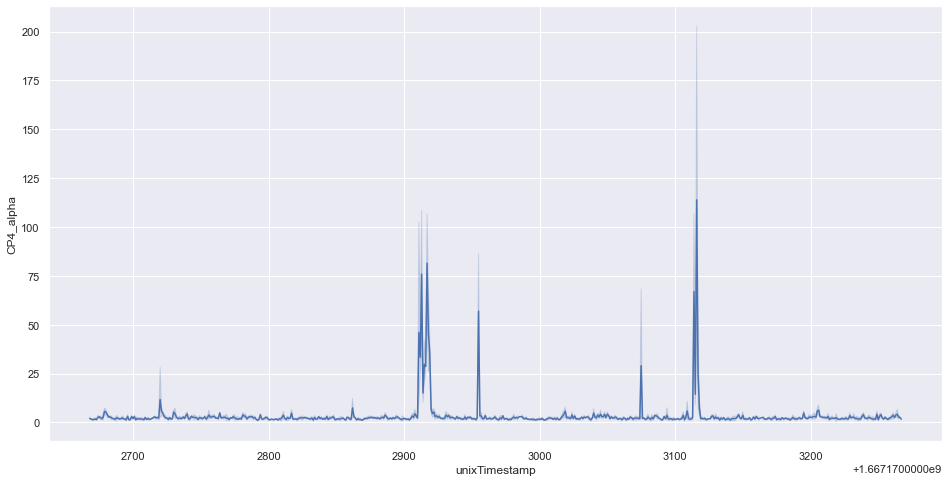

In [45]:
sns.lineplot(data=df_powerSpectrum, x="unixTimestamp", y="CP4_alpha")

[] filter for scenarios where the signal quality is good

[] then we observe across channels

[] then across multiple sessions

[] then across multiple participants

[] then we have a baseline for the power spectral data

In [122]:
def get_powerSpectrumSignalQuality(runTimestamp: str):
    df_powerSpectrum = pd.read_json(f"/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/powerByBand_{runTimestamp}.json")
    df_signalQuality = pd.read_json(f"/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/signalQuality_{runTimestamp}.json")

    # average signal quality values per timestamp entries
    df_signalQuality = df_signalQuality.groupby(by="unixTimestamp").mean()
    df_signalQuality.reset_index(level=0, inplace=True)

    # average powerspectrum values per timestamp entries
    df_powerSpectrum = df_powerSpectrum.groupby(by="unixTimestamp").mean()
    df_powerSpectrum.reset_index(level=0, inplace=True)

    # set both timestamp columns to datetime    
    df_powerSpectrum['unixTimestamp']= pd.to_datetime(df_powerSpectrum['unixTimestamp'], unit='s', utc=True)
    df_signalQuality['unixTimestamp'] = pd.to_datetime(df_signalQuality['unixTimestamp'], unit='s', utc=True)

    # merge df
    df_powerSpectrum_signalQuality = df_powerSpectrum.join(df_signalQuality.set_index('unixTimestamp'), on='unixTimestamp')
    
    return df_powerSpectrum_signalQuality



In [180]:
session_a_df = get_powerSpectrumSignalQuality('1674325610')
session_b_df = get_powerSpectrumSignalQuality('1674336341')

In [178]:
session_a_df

,unixTimestamp,CP3_alpha,CP3_beta,CP3_delta,CP3_gamma,CP3_theta,C3_alpha,C3_beta,C3_delta,C3_gamma,C3_theta,F5_alpha,F5_beta,F5_delta,F5_gamma,F5_theta,PO3_alpha,PO3_beta,PO3_delta,PO3_gamma,PO3_theta,PO4_alpha,PO4_beta,PO4_delta,PO4_gamma,PO4_theta,F6_alpha,F6_beta,F6_delta,F6_gamma,F6_theta,C4_alpha,C4_beta,C4_delta,C4_gamma,C4_theta,CP4_alpha,CP4_beta,CP4_delta,CP4_gamma,CP4_theta,CP3_value,C3_value,F5_value,PO3_value,PO4_value,F6_value,C4_value,CP4_value
0,2023-01-21 20:27:59+00:00,304.067808,104.875601,921.445243,14.358351,707.762416,842.056784,485.779782,3170.000245,125.711664,2846.997011,564.520425,367.406135,2642.744193,84.017866,2065.968525,109.205609,43.971424,359.467458,7.474935,254.723076,331.671736,142.038026,1103.746728,19.014220,797.661677,951.844771,411.326516,3473.247789,112.378280,2603.409225,390.751151,167.471492,1127.384713,24.456831,773.046391,72.098065,28.008031,188.923184,6.484047,148.606362,514.560000,5663.648000,4393.788000,131.734000,37.846000,4635.672000,1037.004000,197.444000
1,2023-01-21 20:28:00+00:00,9.291607,4.855598,27.812305,1.130485,17.864479,253.437620,89.929338,331.748401,23.009888,256.352620,146.729357,71.292687,416.337771,20.522063,275.535609,5.556940,2.517583,21.583603,0.859099,14.816963,2.998944,1.303565,11.732006,0.358944,9.389316,167.041964,48.670630,460.158504,14.351370,483.002389,14.453751,5.268496,27.874486,1.205298,17.592500,6.264125,3.018478,12.653026,0.879055,11.819047,46.882500,830.067500,737.902500,36.317500,16.915000,856.857500,58.500000,26.685000
2,2023-01-21 20:28:01+00:00,5.278715,2.492816,8.764327,0.421019,6.335518,210.928494,54.848923,328.472320,17.930297,320.860673,69.734980,26.020503,149.005828,8.835966,133.296730,2.364655,0.894341,4.142501,0.198647,3.079182,1.810962,0.931697,3.020628,0.223279,3.551116,46.198033,10.497262,114.030442,2.554780,117.256639,3.994049,1.481574,11.373816,0.311693,8.914369,2.244784,0.898760,4.271621,0.228901,4.931522,17.280000,687.192500,320.065000,8.587500,7.835000,229.100000,19.152500,9.682500
3,2023-01-21 20:28:02+00:00,4.596364,2.568880,16.325217,0.544478,12.949184,91.427656,18.525995,197.138008,3.869627,149.984155,71.252921,13.139707,59.374192,5.882518,66.079775,2.216236,0.996353,4.437304,0.226299,3.926749,2.030741,1.117673,3.913987,0.215825,4.055854,41.501059,6.519997,53.550494,1.475519,55.092771,4.427315,1.344961,5.582221,0.349649,4.236081,1.815213,0.883551,5.302439,0.219713,5.376695,27.377500,343.727500,172.232500,9.305000,8.902500,121.420000,12.417500,10.332500
4,2023-01-21 20:28:03+00:00,3.322694,1.255114,6.201503,0.295629,4.892880,39.084393,17.591072,98.951931,4.614220,72.476033,31.804954,7.656797,63.848106,2.142775,61.397693,1.147011,0.822903,2.854185,0.182924,2.873890,1.831281,0.931737,3.779392,0.232559,2.820167,61.369015,13.653404,110.824230,3.547739,85.090138,2.302341,1.307341,6.533760,0.232101,5.701726,1.390924,0.743629,3.346109,0.187806,2.958823,11.937500,173.742500,131.587500,6.077500,7.305000,217.510000,12.560000,6.352500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2023-01-21 20:37:54+00:00,1.270031,0.715617,1.225820,0.116686,1.234375,24.501511,10.143997,83.677409,2.487018,68.831432,4.534916,2.071866,6.582142,0.320111,6.565815,0.968778,0.749424,1.247402,0.170225,1.450488,1.022952,0.787628,1.682803,0.151674,1.966453,3.514917,1.837554,5.590192,0.348334,5.959585,1.145235,0.898053,1.621662,0.139417,1.912875,0.971802,0.738844,1.471421,0.123787,1.778336,4.220000,148.622857,16.181429,4.318571,4.807143,13.744286,5.055714,4.312857
433,2023-01-21 20:37:55+00:00,0.962278,0.658628,1.456415,0.124248,1.193456,28.099732,11.375476,114.826184,2.519803,87.914169,4.538428,2.207372,8.634182,0.436019,8.354442,1.100166,0.769207,1.960437,0.122037,1.959600,1.059634,0.658744,1.541654,0.134895,1.594091,3.700210,1.715074,5.586020,0.229483,5.636082,0.977643,0.635023,1.912056,0.134358,1.804198,0.8

In [183]:
session_a_df = session_a_df.iloc[2:]

In [189]:
session_b_df = session_b_df.iloc[2:]

In [196]:
# compare two recording together 
import matplotlib.pyplot as plt

def compare_sessions(df1, df2, channel, band):
    df1 = df1[['unixTimestamp', channel + '_' + band, channel + '_value']]
    df2 = df2[['unixTimestamp', channel + '_' + band, channel + '_value']]
    df1 = df1[df1[channel + '_value'] < 15]
    df2 = df2[df2[channel + '_value'] < 15]
    df1 = df1.rename(columns={channel + '_' + band: 'power'})
    df2 = df2.rename(columns={channel + '_' + band: 'power'})
    df1['session'] = 1
    df2['session'] = 2
    # df = pd.concat([df1, df2])
    
    _, ax = plt.subplots(2)

    ax[0].set(ylim=(0, 10))
    ax[1].set(ylim=(0, 10))
    
    sns.lineplot(data=df1, x="unixTimestamp", y="power", hue="session", ax=ax[0])
    sns.lineplot(data=df2, x="unixTimestamp", y="power", hue="session", ax=ax[1])
    

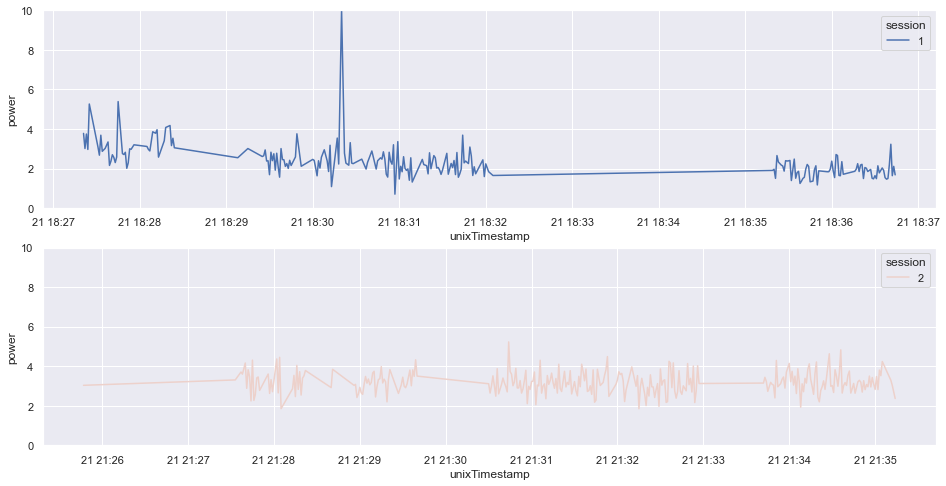

In [197]:
compare_sessions(session_a_df, session_b_df, 'F5', 'alpha')

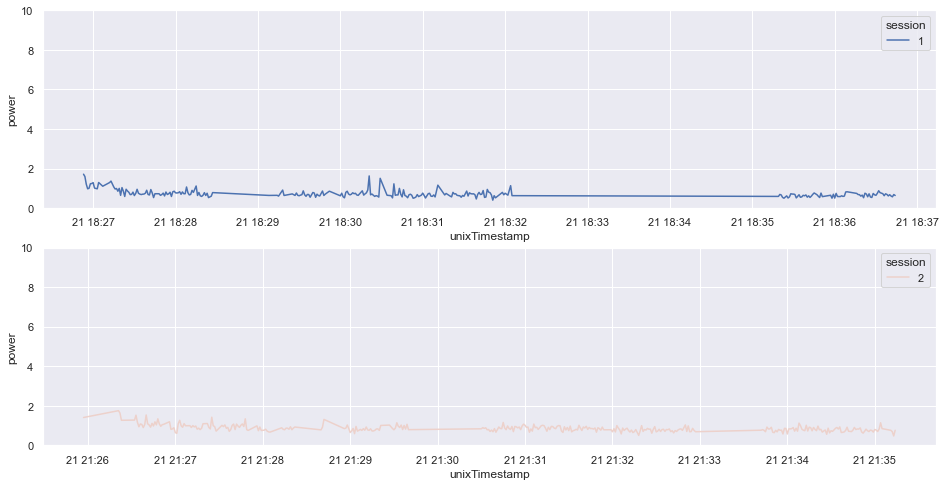

In [198]:
compare_sessions(session_a_df, session_b_df, 'CP4', 'beta')

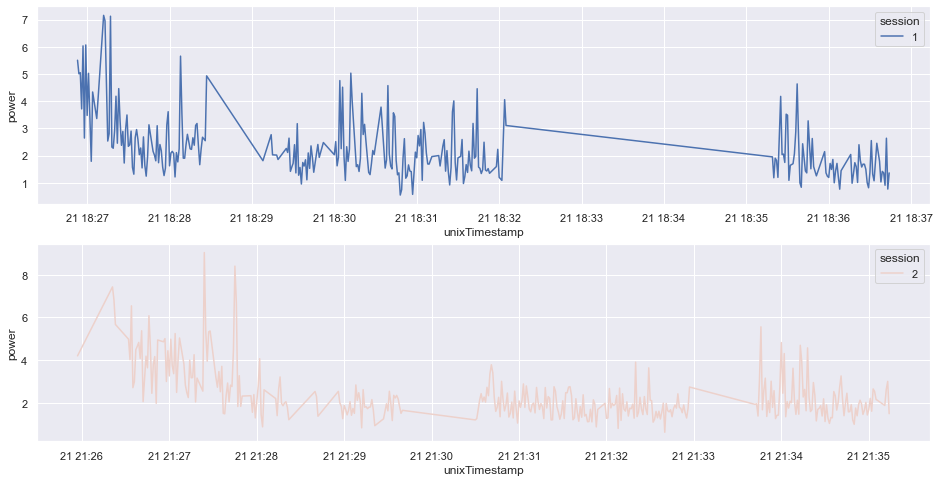

In [186]:
compare_sessions(session_a_df, session_b_df, 'CP4', 'delta')

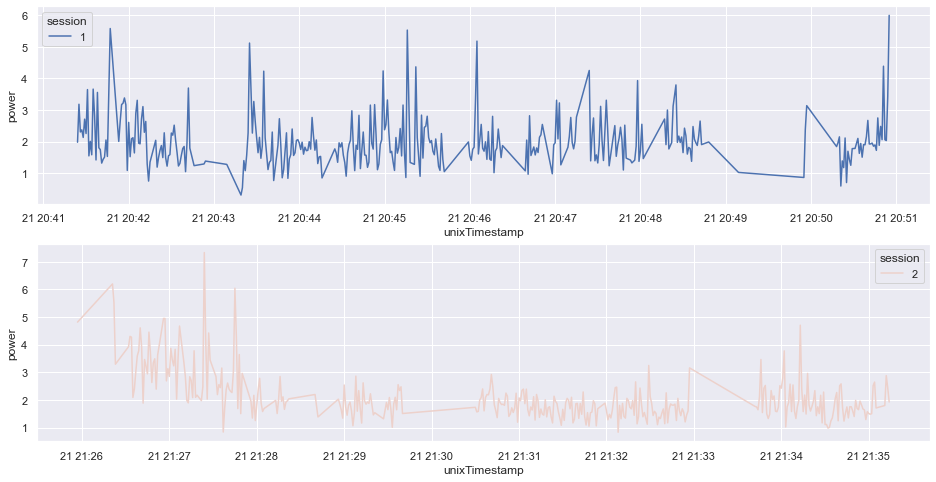

In [174]:
compare_sessions(session_a_df, session_b_df, 'CP4', 'theta')

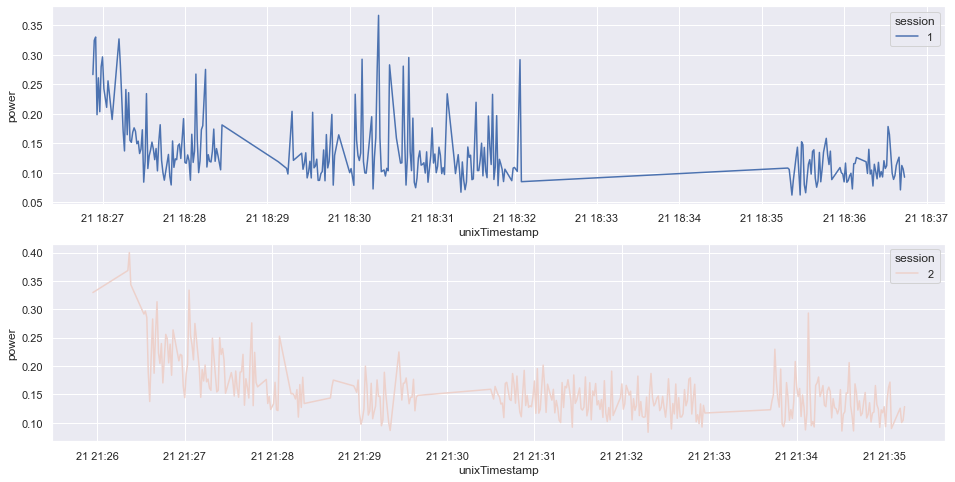

In [187]:
compare_sessions(session_a_df, session_b_df, 'CP4', 'gamma')

In [ ]:
# I think the steps above is good enough to start with ... nah keep going deep

# pipe the dataset of cleaned data to kusto per userGuid and present that for starters.....

# do brain power & health vis

# brain power & productivity vis

In [ ]:
# TODO: now do average across a set of channels
# need to be strategic about how we judge signal quality over a group

In [ ]:
# need to run data through Alex's app to see what I can learn from there

# also read about how to do time series analysis when values change .. 
# would it be better to just look at overall flow in between? like how do I summarize it?

In [ ]:
[x]read through papers and see approaches
# you can compute relative power from absolute power dataset 